In-class exercise 4.1
UW AMATH 301 - Jakob Kotas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,fmin

best fit line (our code): y = -2.060070249850888 x + 4.069437338458485
best fit line (polyfit): y = -2.0600702498508845 x + 4.06943733845848


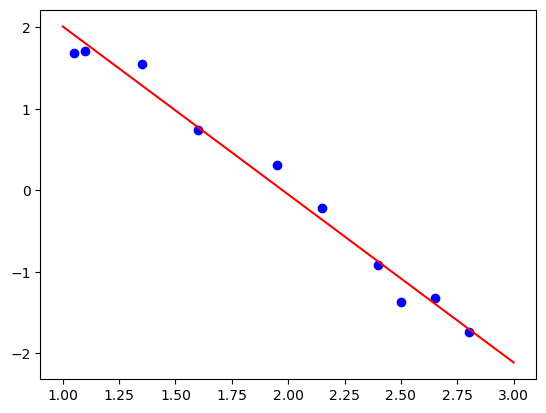

In [5]:
#1
#(a)
xvec = np.array([1.05,1.1, 1.35,1.6, 1.95, 2.15,  2.4,  2.5, 2.65,2.8])
yvec = np.array([1.68,1.71,1.55,0.74,0.31,-0.22,-0.92,-1.37,-1.32,-1.74])

plt.plot(xvec,yvec,'bo')

#(b)
n = len(xvec)
M = np.array([[np.sum(xvec**2),np.sum(xvec)],[np.sum(xvec),n]]) #left-hand-side matrix
R = np.array([np.sum(xvec*yvec),np.sum(yvec)]) #right-hand-side vector
V = np.linalg.solve(M,R) #unknown vector, V=[A,B]^T. A=slope, B=y-intercept
A = V[0]
B = V[1]
print('best fit line (our code): y =',A,'x +',B)

def bestfitline(x):
    return A*x+B

xx = np.arange(1,3.05,2)
plt.plot(xx,bestfitline(xx),'-r')

#(c)
coeffs = np.polyfit(xvec,yvec,1)
print('best fit line (polyfit): y =',coeffs[0],'x +',coeffs[1])

best fit parabola (our code): y= -0.3282310852253291 x^2 + -0.8146204660246694 x + 3.0129073957106915
best fit parabola (polyfit): y= -0.32823108522537536 x^2 + -0.8146204660244933 x + 3.0129073957105414


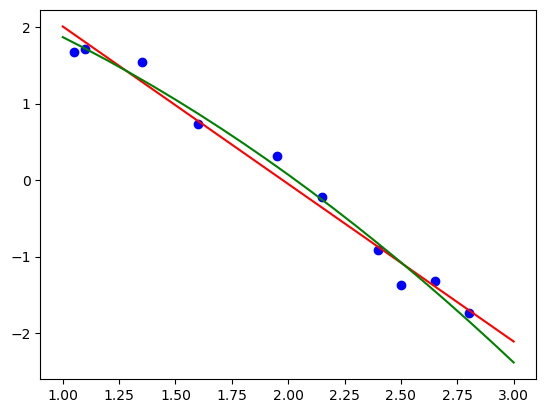

In [7]:
#(f)
M2 = np.array([[np.sum(xvec**4),np.sum(xvec**3),np.sum(xvec**2)],
               [np.sum(xvec**3),np.sum(xvec**2),np.sum(xvec)],
               [np.sum(xvec**2),np.sum(xvec),n]])
R2 = np.array([np.sum(xvec**2*yvec),np.sum(xvec*yvec),np.sum(yvec)])
V2 = np.linalg.solve(M2,R2)
A2 = V2[0]
B2 = V2[1]
C2 = V2[2]
print('best fit parabola (our code): y=',A2,'x^2 +',B2,'x +',C2)

coeffs2 = np.polyfit(xvec,yvec,2)
print('best fit parabola (polyfit): y=',coeffs2[0],'x^2 +',coeffs2[1],'x +',coeffs2[2])

def bestfitparabola(x):
    return A2*x**2+B2*x+C2

plt.plot(xvec,yvec,'bo')
xx = np.arange(1,3.05,0.1)
plt.plot(xx,bestfitline(xx),'-r')
plt.plot(xx,bestfitparabola(xx),'-g')

A = 0.942969446217848 , C = 2.748209453386965


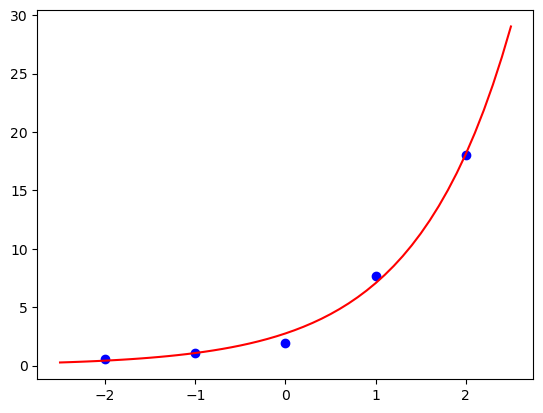

In [9]:
#2

xvec = np.arange(-2,3,1)
yvec = np.array([0.53,1.11,1.89,7.68,18.0])
plt.plot(xvec,yvec,'bo')

#(a,b)
def grade2(AC):
    A=AC[0]
    C=AC[1]
    
    vec = (C*np.exp(A*xvec)-yvec)*C*np.exp(A*xvec)*xvec
    de2da = np.sum(vec)

    vec = (C*np.exp(A*xvec)-yvec)*np.exp(A*xvec)
    de2dc = np.sum(vec)

    return np.array([de2da,de2dc])

root = fsolve(grade2,np.array([1,3])) #[A,C]
#root = fsolve(grade2,np.array([0,0]))
#root = fsolve(grade2,np.array([1,1]))
print('A =',root[0],', C =',root[1])

xx = np.arange(-2.5,2.55,0.1)
plt.plot(xx,root[1]*np.exp(root[0]*xx),'-r')

A = 0.8984759592499608 , C = 2.737403861401295


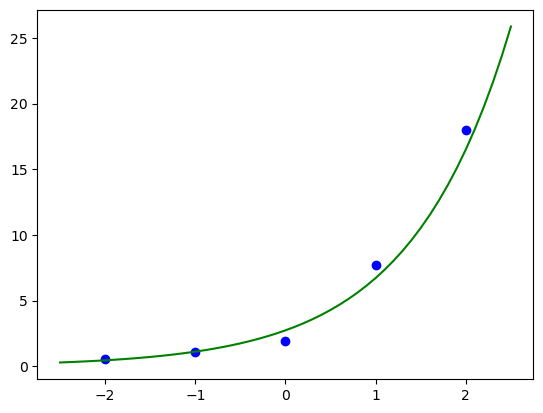

In [139]:
#2(c)

zvec = np.log(yvec)
coeffs = np.polyfit(xvec,zvec,1) #[A,ln(C)]
Aexp = coeffs[0]
Cexp = np.exp(coeffs[1])
print('A =',Aexp,', C =',Cexp)

xx = np.arange(-2.5,2.55,0.1)
plt.plot(xvec,yvec,'bo')
plt.plot(xx,Cexp*np.exp(Aexp*xx),'-g')

E2: y = 0.5000000000000001 x + -0.6666666666666666
Optimization terminated successfully.
         Current function value: 0.250020
         Iterations: 100
         Function evaluations: 187
Einf: y = 0.4999879977733672 x + -0.7499843678158653
Optimization terminated successfully.
         Current function value: 0.500036
         Iterations: 65
         Function evaluations: 122
E1: y = 0.5000236755507119 x + -0.5000832648553554


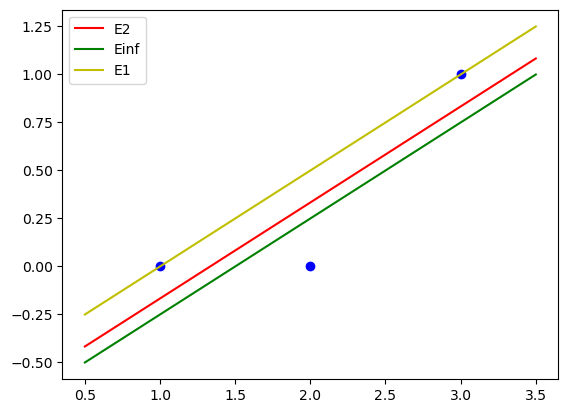

In [39]:
#3
#(a)
xvec = np.array([1,2,3])
yvec = np.array([0,0,1])
plt.plot(xvec,yvec,'bo')

#(b)
coeffs2 = np.polyfit(xvec,yvec,1)
A2 = coeffs2[0]
B2 = coeffs2[1]
print('E2: y =',A2,'x +',B2)
xx = np.array([0.5,3.5])
yy2 = A2*xx+B2
plt.plot(xx,yy2,'-r',label='E2')

#(c)
def finf(AB):
    A=AB[0]
    B=AB[1]
    return np.max(np.abs(A*xvec+B-yvec))

coeffsinf = fmin(finf,np.array([0,0]))
Ainf = coeffsinf[0]
Binf = coeffsinf[1]
print('Einf: y =',Ainf,'x +',Binf)
yyinf = Ainf*xx+Binf
plt.plot(xx,yyinf,'-g',label='Einf')

#(d)
def f1(AB):
    A=AB[0]
    B=AB[1]
    return np.sum(np.abs(A*xvec+B-yvec))

coeffs1 = fmin(f1,np.array([0,0]))
A1 = coeffs1[0]
B1 = coeffs1[1]
print('E1: y =',A1,'x +',B1)
yy1 = A1*xx+B1
plt.plot(xx,yy1,'-y',label='E1')

plt.legend()

best fit line: y = 0.7138255122802073 x + 0.20427039620417828


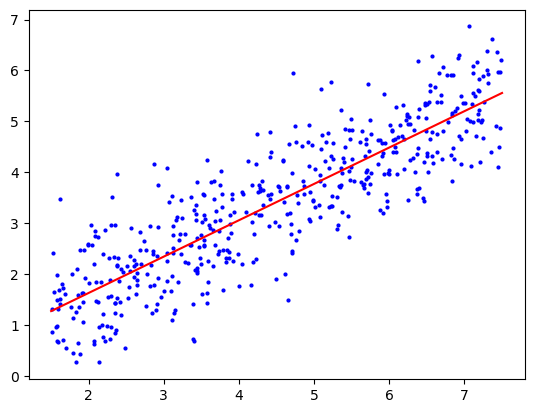

In [53]:
#4

data = np.loadtxt('incomehappiness.csv', delimiter=',', skiprows=1)

xvec = data[:,1]
yvec = data[:,2]
plt.plot(xvec,yvec,'bo',markersize=2)

coeffs = np.polyfit(xvec,yvec,1)
print('best fit line: y =',coeffs[0],'x +',coeffs[1])
xx = np.array([1.5,7.5])
plt.plot(xx,coeffs[0]*xx+coeffs[1],'-r')
